## Car Price Prediction

### Problem Statement 

    A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

    They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

        1. Which variables are significant in predicting the price of a car
        2. How well those variables describe the price of a car
        3. Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
    The goal is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Read and Understanding Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car.shape

(205, 26)

In [6]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 2. Data Cleaning and Visualization

In [7]:
# Check for column- wise null values
round(car.isnull().sum()/len(car.index),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

- None of the column has null values

In [8]:
car['symboling'] = car['symboling'].astype('str')

In [9]:
# select numeric columns
num_cols = car.select_dtypes(['int64', 'float64']).columns
# convert to list 
num_cols = num_cols.values.tolist()
# Remove Car_ID 
num_cols.remove('car_ID')
num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [10]:
# Check for outliers 
car[num_cols].describe([.25,.5,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,110.00,115.544,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,196.36,202.480,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,70.46,71.700,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,57.50,59.100,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,3503.00,3948.000,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,201.20,302.160,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.78,3.800,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,3.64,3.900,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,21.82,23.000,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,180.80,207.000,288.00


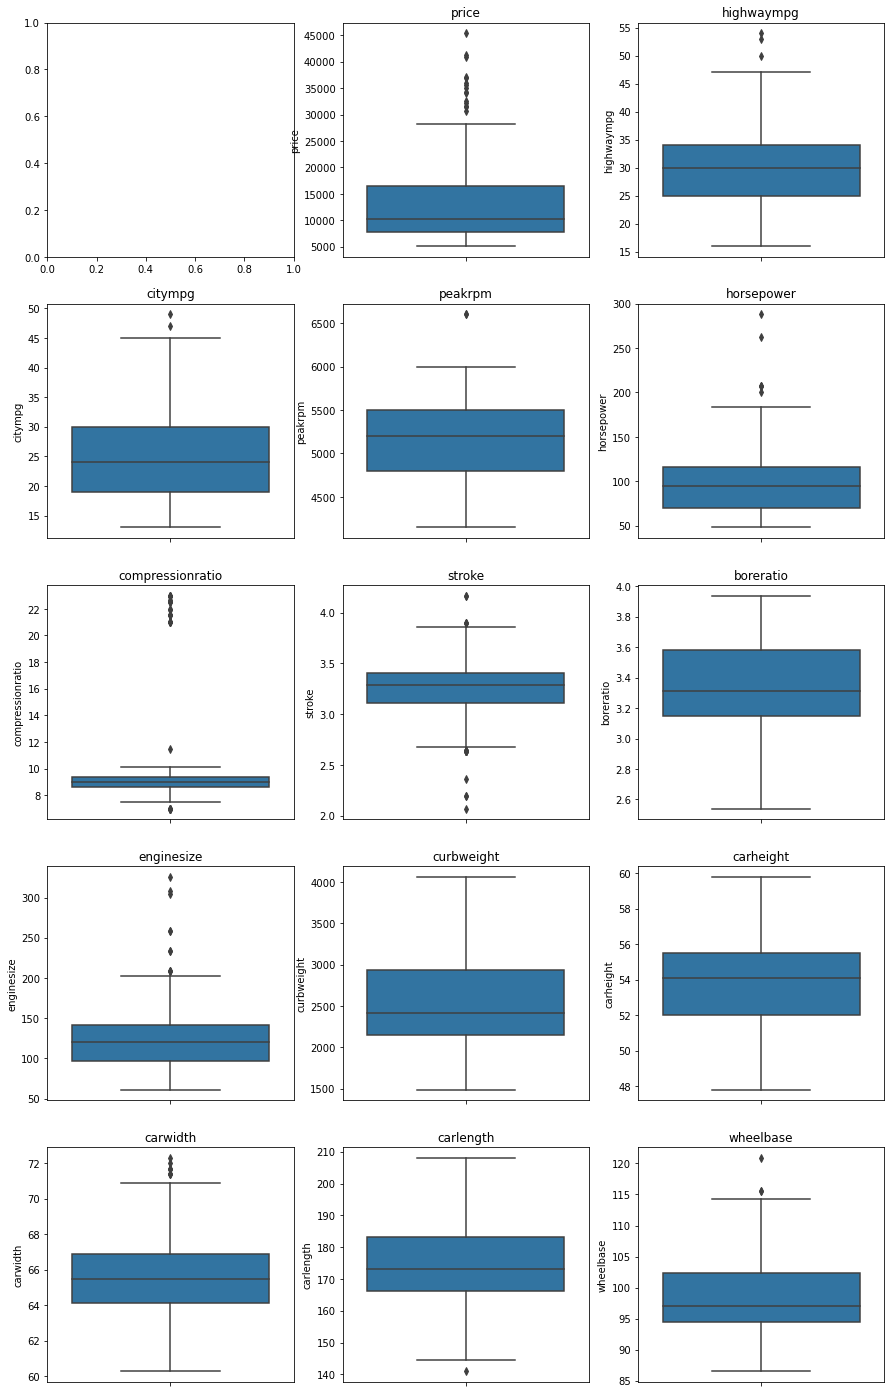

In [11]:
import math
# define a function to make a boxplot
def udf_boxplot(*args, df):
    # to determine how many subplots should be drawn
    m = math.ceil(len(args)/3)
    
    # Plotting subplot
    fig, axes = plt.subplots(m,3,figsize=(15, 5*m))
    ax_li     = [item for sublist in axes for item in sublist]
    for col in args:
        ax_list = ax_li.pop()
        sns.boxplot(y=df[col], ax= ax_list)
        ax_list.set_title(col)
        

udf_boxplot(*num_cols, df=car)

In [12]:
# Check for categorical variables 
car.select_dtypes('object')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [13]:
# Changing the carName column 
car['CarName'] = car['CarName'].str.replace('-', ' ')
##car['Name&Model'] = car['CarName']
car['CarName']    = car['CarName'].apply(lambda x: x.split(' ',1)[0])

In [14]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
car['CarName']    = car['CarName'].replace({'toyouta':'toyota','maxda':'mazda','Nissan':'nissan','vw':'volkswagen', 'vokswagen':'volkswagen','porcshe':'porsche'})

car['drivewheel'] = car['drivewheel'].replace({'4wd':'fwd'})

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

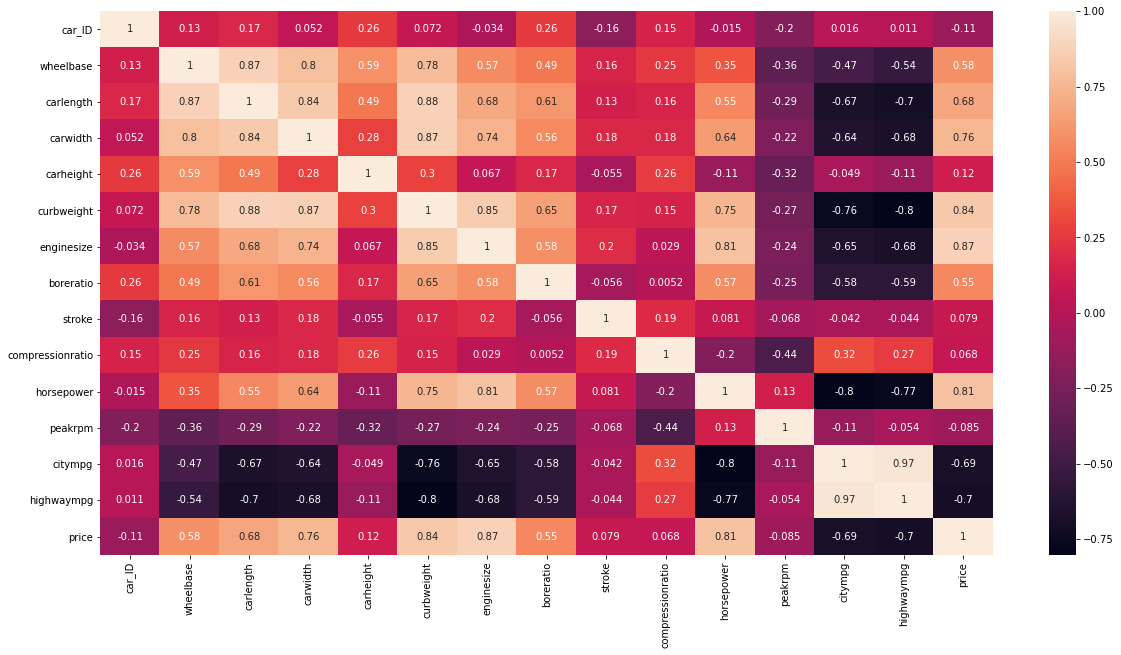

In [17]:
# Check for correlation between variables 
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(), annot=True)
plt.show()

In [18]:
# Check for categorical variables 
car.select_dtypes('object')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [19]:
object_cols = ['symboling', 'CarName','fueltype', 'aspiration','doornumber', 'drivewheel', 'enginelocation',
       'carbody',  'enginetype',
       'cylindernumber', 'fuelsystem']

In [20]:
# DUmmify all the object columns
for i in object_cols:
    dummies_val = pd.get_dummies(car[i], prefix=i, drop_first=True)
    car = pd.concat([car,dummies_val], axis= 1)
    car.drop(i, axis=1, inplace=True) 

car.head(5)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
car.drop('car_ID', axis=1, inplace=True)

## 3. Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [22]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
df_train.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,...,0,0,0,1,0,0,0,0,0,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,...,0,0,0,0,0,0,0,1,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,1,0,0


## 4. Rescaling the features

In [24]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [25]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [26]:
df_train[num_cols].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_train.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# Divide the training datasets into X_train and y_train for model building
y_train = df_train.pop('price')
X_train = df_train

## 5. Build a linear model using RFE

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 23),
 ('carlength', False, 26),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 29),
 ('horsepower', False, 36),
 ('peakrpm', False, 18),
 ('citympg', False, 40),
 ('highwaympg', False, 22),
 ('symboling_-2', False, 8),
 ('symboling_0', False, 49),
 ('symboling_1', False, 47),
 ('symboling_2', False, 48),
 ('symboling_3', False, 46),
 ('CarName_audi', False, 13),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 12),
 ('CarName_chevrolet', False, 25),
 ('CarName_dodge', False, 21),
 ('CarName_honda', False, 20),
 ('CarName_isuzu', False, 45),
 ('CarName_jaguar', False, 34),
 ('CarName_mazda', False, 42),
 ('CarName_mercury', False, 56),
 ('CarName_mitsubishi', False, 16),
 ('CarName_nissan', False, 41),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 19),
 ('CarName_porcshce', False, 57),
 ('CarName_porsche', True, 1),

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'CarName_bmw',
       'CarName_porsche', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CarName_audi', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porcshce',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       'fue

## Build model using statsmodel for detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [36]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.21e-64
Time:                        19:50:29   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [37]:
X_train_rfe.drop('const', axis=1, inplace= True)

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
5,CarName_porsche,1.67
6,enginelocation_rear,1.61
9,cylindernumber_twelve,1.50
7,enginetype_rotor,1.27
4,CarName_bmw,1.18
8,cylindernumber_three,1.01


- Drop column `enginetype_rotor'

In [39]:
# dropping the colum dec
X_train_rfe.drop('cylindernumber_twelve', axis=1, inplace= True)

In [40]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.18e-65
Time:                        19:50:30   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [41]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
6,CarName_porsche,1.80
7,enginelocation_rear,1.65
8,enginetype_rotor,1.17
5,CarName_bmw,1.09
9,cylindernumber_three,1.05


In [42]:
# dropping the colum dec
X_train_rfe.drop('curbweight', axis=1, inplace= True)

In [43]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           2.01e-63
Time:                        19:50:30   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [44]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
5,CarName_porsche,1.67
6,enginelocation_rear,1.64
7,enginetype_rotor,1.14
4,CarName_bmw,1.09
8,cylindernumber_three,1.05


-As seen, VIF and p-values are within acceptable range. Hence we can make predictions on this model

## 6. Residual analysis of the train data 

In [45]:
y_train_price = lm_3.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

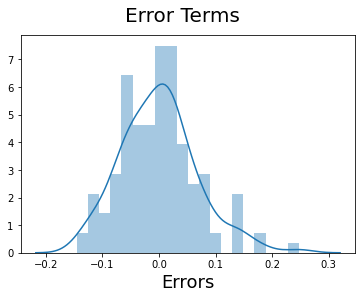

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## 7. Making Predictions

In [47]:
#### Applying the scaling on the test sets

df_test[num_cols] = scaler.transform(df_test[num_cols])

In [48]:
#### Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [49]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [50]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CarName_audi', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porcshce',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'cylindernumber_twelve', 'curbweight'], axis = 1)

In [51]:
X_test_m4.head(5)

,const,carwidth,enginesize,boreratio,CarName_bmw,CarName_porsche,enginelocation_rear,enginetype_rotor,cylindernumber_three
160,1.0,0.341667,0.139623,0.404762,0,0,0,0,0
186,1.0,0.433333,0.181132,0.404762,0,0,0,0,0
59,1.0,0.516667,0.230189,0.563492,0,0,0,0,0
165,1.0,0.308333,0.139623,0.444444,0,0,0,0,0
140,1.0,0.291667,0.177358,0.746032,0,0,0,0,0


In [52]:
X_test_m4.describe()

,const,carwidth,enginesize,boreratio,CarName_bmw,CarName_porsche,enginelocation_rear,enginetype_rotor,cylindernumber_three
count,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0
mean,1.0,0.480376,0.265673,0.556580,0.032258,0.016129,0.032258,0.0,0.0
std,0.0,0.165440,0.162820,0.228484,0.178127,0.127000,0.178127,0.0,0.0
min,1.0,0.183333,0.067925,-0.111111,0.000000,0.000000,0.000000,0.0,0.0
25%,1.0,0.358333,0.177358,0.404762,0.000000,0.000000,0.000000,0.0,0.0
50%,1.0,0.441667,0.226415,0.563492,0.000000,0.000000,0.000000,0.0,0.0
75%,1.0,0.516667,0.316038,0.746032,0.000000,0.000000,0.000000,0.0,0.0
max,1.0,0.975000,0.932075,0.888889,1.000000,1.000000,1.000000,0.0,0.0


In [53]:
# Making predictions using the fourth model
y_pred_m4 = lm_3.predict(X_test_m4)

### Evaluate the model

In [54]:
r2_score(y_true=y_test, y_pred=y_pred_m4)

0.903197042463961

In [55]:
r2_score(y_true=y_train, y_pred=y_train_price)

0.9010316798260971

Text(0, 0.5, 'y_pred')

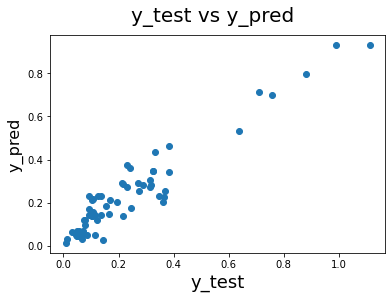

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

-R2 score and adjusted R2 score are same for traning and test data

Recommendations :
    - Factors that influence the car price are :
        -carwidth       
        -enginesize          
        -boreratio        
        -CarName_bmw          
        -CarName_porsche     
        -enginelocation_rear   
        -enginetype_rotor       
        -cylindernumber_three    